# Lignes de niveau, Projet Maths Info
## Augustin Jacquillat Louis Perrotin

## Présentation du projet 

Le projet que nous avons réalisé consiste en l'écriture de fonctions Python qui doivent permettrent de réaliser la tracé de lignes de niveau pour des fonctions de R² dans R. 

Pour ce faire, nous avons séparé en deux grandes étapes le travail à fournir: 
    1. Ecrire une fonction qui réalise le tracé de ces lignes dans un cas simple 
    2. Ecrire une fonction qui prend en arguments une fonction de R² dans R et un ensemble 
    d'intervalles sur lesquels on pourra lancer la fonction précédement définie

## Démarche(s)

Nous avons mis en oeuvre plusieurs méthodes pour l'écriture de la fonction simple_contour. 
L'idée commune à ces méthodes est de procéder de proche c'est a dire que la donnée d'un point conduit à l'obtention du point suivant. 

Il nous faut donc un premier point que nous trouvons avec la fonction find_seed.

Une fois ce point trouvé, plusieurs méthodes sont utilisées pour déterminer le point suivant:
    1. Une méthode en utilisant le théorème des fonction  implicites 
    2. Une méthode en utilisant la caractérisation par le gradient 

# 0.Fonction find_seed

## 0.1. Fonction find_seed : le code
## 0.2. Fonction find_seed : exemple d'utilisation

## 0.1. Fonction find_seed : le code

In [ ]:
##On importe une fois pour toutes tous les modules nécessaires dans la suite du projet 

import autograd
from autograd import numpy as np
from math import sqrt
import pylab as pl


def find_seed(f,a,b,x, c=0, eps=2**-26):
    milieu=(b+a)/2
    if (f(x,a)>c and f(x,b)>c) or (f(x,a)<c and f(x,b)<c):
        return None
    elif f(x,a)==c:
        return a
    elif f(x,b)==c:
        return b
    while (b-a)/2>eps:
        if f(x,milieu)>=c:
            b=milieu
        else:
            a=milieu
        milieu=(b+a)/2
    return milieu


## 0.2. Fonction find_seed : exemple d'utilisation 

In [ ]:

f=lambda x,y:(x**2+y**2)*1.0   ##La multiplication par 0.1 permet de s'assurer du type flotant de f(x,y)

print (find_seed(f,0,1,0.5,1)-np.sin(np.pi/3)) ##On affiche la différence entre la valeur obtenue par 
                                               #l'algorithme et la valeur théorique fournie par numpy 


On note que l'erreur obtenue est de l'ordre de $10^{-10}$ ce qui correpond à peu près au $\varepsilon$ fixé sachant qu'il y a aussi une erreur sur le calcul de numpy  

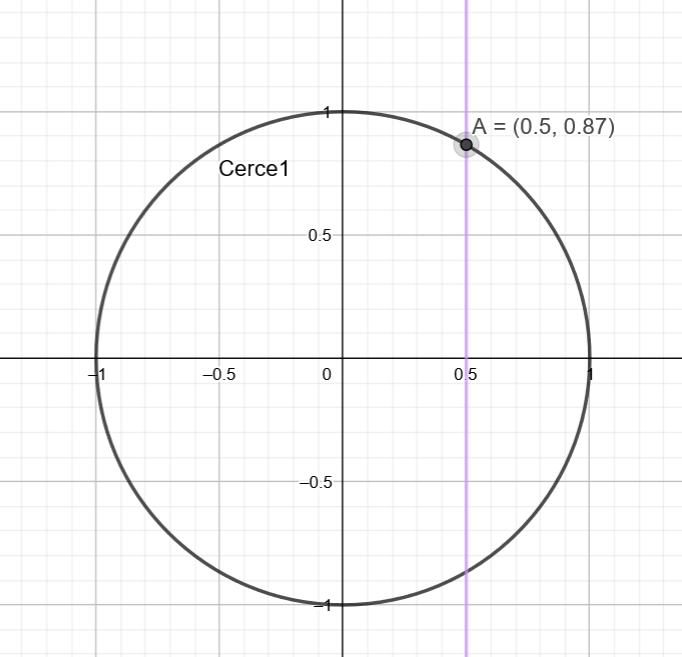

# 1. La fonction simple contour 

# 1.1. La fonction simple contour : théorème des fonctions implicites 

## 1.1. La fonction simple contour : théorème des fonctions implicites : l'idée

Nous avons trouvé, en supposant qu'il existe, grâce à la fonction find_seed() une point de départ qui vérifie f(0,$y_0$)=c.
A partir de ce point nous allons essayer d'en construire un autre qui soit sur la ligne de niveau. 

Nous étudions une fonction f:R²->R et nous voulons déterminer la ligne de niveau c. 
On pose donc g:=f-c$*$id et on étudie les $zéros$ de la fonction g.

Les mathématiques (le théorème des focntions implictes) nous affirment que si $g(x_0,y_0)=0$ et que sa dérivée partielle selon la coordonée $x_i$ est non nulle (ce qui correpond à une différentielle partielle inversible car on travaille dans R²), alors on peut au voisinage du point  $(x_0,y_0)$ définir une fonction $\phi$ continuement différentiable telle que $\phi(x_j)=x_i\iff g(x_i,x_j)=0$ (remarque, le couple $(x_i,x_j)$ désigne soit le couple (x,y) soit le couple (y,x)). On connait même dans ce cas 

C'est forts de cette connaissance que nous choisissons de déterminer le point $(x_1,y_1)$ proche de $(x_0,y_0)$ à $\delta$ en décalant x (ou respectivement y) d'une quantitée $\delta$' (que nous expliciterons plus tard). On suppose que la différentielle partielle de g selon y est non nulle en $(x_0,y_0)$ (ou respecetivement celle en x). On est alors assuré que le point suivant vérifie  $\underline{\phi(x_1)=y_1}$ (ou symétriquement en y et x). 

On écrit maintenant $x_1=x_0+\delta$. Ainsi, $y_1=\phi(x_1)=y_0+d\phi(x_0).\delta'+o(\delta')$ ce qui donne au premier ordre en $\delta$' une valeur du prochain point. 

Détermions $\delta$' pour que les deux points trouvés soient distants de $\delta$ exactement. 
On choisit $\delta$'=$\frac{\delta}{\sqrt{1+d\phi(x_0)^2}}$ et on a alors directement les points espacés de $\delta$

## 1.1.a. La fonction simple contour : théorème des fonctions implicites: le code 

In [ ]:
def grad_f(x,y):
    g=autograd.grad
    return np.r_[g(f,0)(x,y),g(f,1)(x,y)]





########Grosse interrogation sur la variable sens dont je ne vois pas l'utilité içi puisqu'elle n'apparaît pas dans le corps de la fonction 

def prochain_point(f,c,x,y,delta=0.01,sens=1):  #cette fonction prend un point en argument et renvoie son 'voisin'
    grad=grad_f(x,y)
    if grad[1]!=0:
        d_phi=-grad[0]/grad[1]
        delta2=delta/sqrt(1+d_phi**2)
        return (x+delta2, y+d_phi*delta2)
    elif grad[0]!=0:
        d_phi=-grad[1]/grad[0]
        delta2=delta/sqrt(1+d_phi**2)
        return (x+d_phi*delta2,y+delta2)
    else: #on ne traite pas le cas de bord d'un point ou le gradiant serait nul
        return None




## 1.1.a. La fonction simple contour : théorème des fonctions implicites: le code 

In [ ]:
##suite du programme 

    
def simple_contour(f, t,d,sens=1, c=1, delta=0.0001):
    if t==None:
        return ([],[])
    else:
        les_x=[d]
        les_y=[t]
        i=0
        while (abs(1-les_x[-1])>delta and abs(1-les_y[-1])>delta and abs(les_x[-1])>delta and abs(les_y[-1])>delta) or i<1/delta :
            i+=1
            point=prochain_point(f,c,les_x[-1],les_y[-1],delta,sens)
            if point==None:
                a=newton(f,c,les_x[-1]+delta, les_y[-1]+delta)
                les_x.append(a[0])
                les_y.append(a[1])                
            else :
               les_x.append(point[0])
               les_y.append(point[1])
        if sens==-1:
            les_y.reverse()
            les_x.reverse()
            for i in range(len(les_x)):
                les_x[i]=-les_x[i]
        return (les_x,les_y)
    
    
a=simple_contour(f,find_seed[1],find_seed[0,])        
X=a[0]
Y=a[1]
pl.plot(X,Y)
pl.axis("equal")
pl.show()